In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
accepted = pd.read_csv('C:/Users/nisha/Documents/DATA 903/Machine Learning/lending-club/accepted_2007_to_2017Q3.csv.gz',compression='gzip', low_memory=True)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Exploratory Analysis

In [3]:
accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#create new data frame for manipulation
df = accepted.copy()

In [5]:
#df.to_csv('C:/Users/nisha/Documents/DATA 903/Machine Learning/lending-club/df.csv')

In [6]:
df.shape

(1646801, 150)

In [7]:
#checking the difference between loan_amnt, funded_amnt and funded_amnt_inv to see if the columns add any value - 
#retaining funded_amnt

df['test'] = np.where(df['funded_amnt_inv'] != df['funded_amnt'], 0 , 1)

print(df['test'].value_counts())

df = df.drop('test', axis=1)

df['test1'] = np.where(df['loan_amnt'] != df['funded_amnt'], 0, 1)

print(df['test1'].value_counts())

df = df.drop('test1', axis=1)

1    1517244
0     129557
Name: test, dtype: int64
1    1644713
0       2088
Name: test1, dtype: int64


In [8]:
#Exploratory analysis
print(df.isnull().sum())
for i in df.columns:
    print("The nulls in column " + i +" "+ "are : " +str(df[i].isnull().sum()))
    print("The data type of the columns is: " +str(df[i].dtype))
    print("Number of unique values in the column are: " +str(len(df[i].unique())))
    print("The count of the values in that column are: \n" +str(df[i].value_counts()))#.sort_index().plot(kind='bar')
    #plt.show()
    print("\n")
    

id                                                  0
member_id                                     1646801
loan_amnt                                          23
funded_amnt                                        23
funded_amnt_inv                                    23
term                                               23
int_rate                                           23
installment                                        23
grade                                              23
sub_grade                                          23
emp_title                                      102464
emp_length                                      95221
home_ownership                                     23
annual_inc                                         27
verification_status                                23
issue_d                                            23
loan_status                                        23
pymnt_plan                                         23
desc                        

Number of unique values in the column are: 3
The count of the values in that column are: 
 36 months    1182406
 60 months     464372
Name: term, dtype: int64


The nulls in column int_rate are : 23
The data type of the columns is: float64
Number of unique values in the column are: 618
The count of the values in that column are: 
10.99    44166
13.99    43032
11.99    41798
5.32     41002
11.49    32009
16.99    30565
12.99    29275
7.89     28519
9.17     27833
15.61    25209
14.99    25111
13.49    24305
10.49    22024
9.99     21547
12.74    19991
18.99    19781
12.69    18779
12.29    18599
17.57    18005
11.44    17970
8.18     17810
13.33    17568
15.99    17488
13.67    17335
19.99    17206
16.29    17097
15.31    16430
11.53    16181
14.49    16121
18.25    15459
         ...  
14.43        4
20.52        4
16.46        3
18.86        3
14.67        3
14.57        3
20.69        3
13.84        2
22.94        2
15.29        2
17.28        2
16.33        2
14.77        2
17.91   

The nulls in column verification_status are : 23
The data type of the columns is: object
Number of unique values in the column are: 4
The count of the values in that column are: 
Source Verified    628245
Not Verified       516009
Verified           502524
Name: verification_status, dtype: int64


The nulls in column issue_d are : 23
The data type of the columns is: object
Number of unique values in the column are: 125
The count of the values in that column are: 
Mar-2016    61992
Oct-2015    48631
Jul-2015    45962
Dec-2015    44343
Aug-2017    43573
Sep-2017    39713
Feb-2016    39529
Jul-2017    39415
Oct-2014    38783
Jun-2017    38087
May-2017    37681
Nov-2015    37530
Mar-2017    37181
Apr-2016    36432
Aug-2016    36280
Dec-2016    36183
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
Jul-2016    34696
Nov-2016    34591
Jun-2016    33019
Oct-2016    32772
Jan-2016    32366
May-2015    31913
Jan-2017    31835
Apr-2017    29683
Jul-2014    29306
Sep-2015    28641
Jun-2015  

The nulls in column purpose are : 23
The data type of the columns is: object
Number of unique values in the column are: 15
The count of the values in that column are: 
debt_consolidation    955783
credit_card           363962
home_improvement      109031
other                  93576
major_purchase         35596
medical                18901
small_business         18613
car                    17641
moving                 11388
vacation               11152
house                   7268
wedding                 2350
renewable_energy        1094
educational              423
Name: purpose, dtype: int64


The nulls in column title are : 23348
The data type of the columns is: object
Number of unique values in the column are: 63156
The count of the values in that column are: 
Debt consolidation                          831200
Credit card refinancing                     316681
Home improvement                             96011
Other                                        81845
Major purchase      

The count of the values in that column are: 
664.0    148985
669.0    143663
674.0    143570
679.0    128017
684.0    127462
689.0    111675
694.0    108837
699.0     97485
704.0     90032
709.0     80978
714.0     70768
719.0     62642
724.0     54179
729.0     42879
734.0     37100
739.0     29154
744.0     25827
749.0     20652
754.0     18767
759.0     16103
764.0     13141
769.0     12067
774.0     10000
779.0      9263
784.0      8167
789.0      6517
794.0      6119
799.0      4849
804.0      4440
809.0      3671
814.0      2666
819.0      2132
824.0      1571
829.0      1188
834.0       760
839.0       448
844.0       297
850.0       218
654.0       131
659.0       127
649.0       112
644.0       102
634.0         6
639.0         5
629.0         2
614.0         2
624.0         1
619.0         1
Name: fico_range_high, dtype: int64


The nulls in column inq_last_6mths are : 53
The data type of the columns is: float64
Number of unique values in the column are: 29
The count of the v

The count of the values in that column are: 
20.0     60323
21.0     59862
19.0     59681
22.0     59071
18.0     59057
17.0     58339
23.0     57829
24.0     56333
16.0     56326
25.0     54430
15.0     54208
26.0     52194
14.0     51604
27.0     49611
13.0     48691
28.0     46819
29.0     44734
12.0     44184
30.0     42185
11.0     40138
31.0     39222
32.0     36700
10.0     35414
33.0     33902
34.0     31484
9.0      30192
35.0     29113
36.0     26823
37.0     24839
8.0      24646
         ...  
122.0        4
137.0        3
124.0        3
118.0        3
119.0        3
144.0        2
126.0        2
127.0        2
114.0        2
151.0        2
146.0        2
141.0        1
173.0        1
169.0        1
162.0        1
157.0        1
156.0        1
176.0        1
150.0        1
120.0        1
140.0        1
138.0        1
136.0        1
135.0        1
133.0        1
130.0        1
129.0        1
125.0        1
117.0        1
160.0        1
Name: total_acc, Length: 146, dtype: int

The count of the values in that column are: 
0.00        1737
1431.12      312
1784.23      306
1955.40      245
956.78       242
2128.02      228
1977.77      227
2862.28      222
2528.96      214
1264.46      213
2148.90      206
1896.71      199
2146.73      197
2676.35      196
1913.55      195
1148.14      195
1717.38      184
1809.76      184
1517.36      181
2141.07      180
2373.35      165
2534.18      164
1435.16      164
2436.17      160
892.12       155
2361.65      155
2578.64      148
2171.72      148
1218.06      147
3568.46      146
            ... 
7318.24        1
14343.35       1
4755.25        1
11003.08       1
6391.32        1
12488.74       1
5238.53        1
5030.39        1
8023.19        1
5300.96        1
6388.57        1
2188.71        1
2195.29        1
9634.51        1
9629.49        1
3900.13        1
5093.40        1
6388.82        1
5973.73        1
5173.80        1
2027.07        1
5082.35        1
6388.07        1
2188.96        1
5680.48        1
201

The count of the values in that column are: 
Jan-2018    828691
Dec-2017       242
Feb-2018       110
Mar-2011       107
Apr-2011       101
Feb-2011        91
Jan-2011        79
May-2011        77
Dec-2010        71
Jun-2011        66
Sep-2011        63
Aug-2011        57
Nov-2010        55
Aug-2010        54
Dec-2009        53
Jul-2011        53
Oct-2009        53
Sep-2010        53
Nov-2009        52
Dec-2008        51
Apr-2012        49
Mar-2010        49
Jul-2010        49
May-2012        48
Mar-2012        48
Oct-2010        48
Oct-2011        47
Oct-2012        47
Jan-2012        45
Dec-2011        43
             ...  
Jul-2015         8
Jan-2016         7
Mar-2014         7
May-2015         7
Apr-2015         7
Nov-2008         7
Jun-2015         6
May-2014         6
Jan-2008         5
Sep-2008         5
Feb-2009         5
Feb-2015         4
Dec-2014         4
Jun-2008         4
Apr-2008         4
Feb-2016         3
Mar-2008         3
Apr-2014         3
Nov-2014         3
Jun-2

The nulls in column verification_status_joint are : 1612287
The data type of the columns is: object
Number of unique values in the column are: 4
The count of the values in that column are: 
Not Verified       21323
Source Verified     7357
Verified            5834
Name: verification_status_joint, dtype: int64


The nulls in column acc_now_delinq are : 52
The data type of the columns is: float64
Number of unique values in the column are: 10
The count of the values in that column are: 
0.0     1638074
1.0        8190
2.0         418
3.0          49
4.0          11
5.0           3
6.0           2
14.0          1
7.0           1
Name: acc_now_delinq, dtype: int64


The nulls in column tot_coll_amt are : 70299
The data type of the columns is: float64
Number of unique values in the column are: 14144
The count of the values in that column are: 
0.0        1330116
50.0          3170
100.0         2549
75.0          1970
200.0         1468
150.0         1427
60.0          1385
70.0          114

The count of the values in that column are: 
0.0     272092
1.0     234769
2.0     139201
3.0      70551
4.0      33002
5.0      15366
6.0       7531
7.0       3751
8.0       1878
9.0       1018
10.0       576
11.0       345
12.0       202
13.0       123
14.0        77
15.0        66
16.0        35
17.0        18
18.0        14
20.0        10
19.0         8
26.0         4
21.0         3
22.0         2
24.0         2
28.0         2
27.0         1
23.0         1
25.0         1
Name: open_rv_12m, dtype: int64


The nulls in column open_rv_24m are : 866152
The data type of the columns is: float64
Number of unique values in the column are: 51
The count of the values in that column are: 
1.0     160400
2.0     150004
3.0     116001
0.0     115112
4.0      81822
5.0      54931
6.0      35789
7.0      23325
8.0      14808
9.0       9499
10.0      6209
11.0      4078
12.0      2562
13.0      1847
14.0      1232
15.0       810
16.0       632
17.0       410
18.0       295
19.0       204
20.0     

The count of the values in that column are: 
0.0         253
1971.0      207
2442.0      203
3252.0      201
2606.0      198
2292.0      198
2842.0      197
2277.0      196
2253.0      195
2831.0      195
2076.0      194
2077.0      194
1998.0      194
2079.0      193
2572.0      193
2954.0      192
1990.0      192
2149.0      191
2387.0      191
2447.0      191
2767.0      191
2537.0      190
2929.0      190
2336.0      189
2569.0      189
3110.0      189
2071.0      188
2587.0      188
2294.0      188
2301.0      188
           ... 
67326.0       1
67324.0       1
67369.0       1
49141.0       1
49144.0       1
49145.0       1
67319.0       1
67318.0       1
67317.0       1
67314.0       1
67341.0       1
67342.0       1
115687.0      1
99941.0       1
67368.0       1
67366.0       1
67365.0       1
94752.0       1
67364.0       1
49115.0       1
67361.0       1
99922.0       1
67359.0       1
67356.0       1
107148.0      1
67354.0       1
67353.0       1
49128.0       1
67346.0    

The count of the values in that column are: 
2.0      171711
3.0      166309
4.0      147480
1.0      131758
5.0      127795
6.0      111191
7.0       99540
8.0       84716
9.0       70596
10.0      60103
11.0      51857
12.0      45137
13.0      39164
14.0      31775
15.0      25803
0.0       24879
16.0      21994
17.0      18669
18.0      16185
19.0      14164
20.0      12148
21.0      10753
22.0       9363
23.0       8141
24.0       7515
25.0       6304
26.0       5506
27.0       4936
28.0       4110
29.0       3729
          ...  
151.0         2
211.0         2
236.0         1
250.0         1
194.0         1
195.0         1
201.0         1
210.0         1
199.0         1
197.0         1
248.0         1
206.0         1
226.0         1
257.0         1
181.0         1
272.0         1
177.0         1
255.0         1
175.0         1
168.0         1
161.0         1
192.0         1
283.0         1
158.0         1
146.0         1
314.0         1
263.0         1
289.0         1
268.0      

The count of the values in that column are: 
5.0     161543
6.0     159056
4.0     151717
7.0     147627
8.0     133245
3.0     121788
9.0     114281
10.0     95768
11.0     78890
2.0      77142
12.0     64233
13.0     51349
14.0     40895
15.0     32318
1.0      29856
16.0     25464
17.0     19725
18.0     15310
19.0     11935
20.0      9281
21.0      7114
22.0      5470
23.0      4167
0.0       3632
24.0      3195
25.0      2495
26.0      1965
27.0      1514
28.0      1135
29.0       928
         ...  
42.0        49
43.0        38
46.0        27
44.0        22
45.0        17
47.0        15
48.0        14
49.0        11
50.0         8
53.0         8
57.0         7
54.0         6
55.0         6
51.0         4
52.0         4
56.0         4
58.0         4
65.0         3
64.0         2
70.0         2
59.0         2
61.0         2
79.0         1
60.0         1
63.0         1
77.0         1
76.0         1
67.0         1
68.0         1
66.0         1
Name: num_bc_tl, Length: 72, dtype: int6

The nulls in column percent_bc_gt_75 are : 66918
The data type of the columns is: float64
Number of unique values in the column are: 265
The count of the values in that column are: 
0.00      365018
100.00    297645
50.00     177779
33.30     108695
66.70     107262
25.00      70492
75.00      62181
20.00      45772
40.00      42516
60.00      38236
80.00      33439
16.70      29456
14.30      18709
83.30      17560
28.60      16202
42.90      14233
57.10      12073
12.50      11950
71.40      10535
85.70       9043
37.50       8765
11.10       7484
22.20       6314
62.50       6072
10.00       4768
87.50       4503
44.40       4398
55.60       3672
30.00       3363
9.10        3201
           ...  
21.70          1
1.90           1
17.20          1
82.60          1
8.80           1
91.30          1
79.30          1
0.63           1
0.17           1
9.40           1
48.00          1
26.90          1
42.40          1
2.60           1
76.00          1
25.90          1
26.50          1
34

The nulls in column sec_app_fico_range_high are : 1624976
The data type of the columns is: float64
Number of unique values in the column are: 62
The count of the values in that column are: 
674.0    1270
669.0    1228
664.0    1217
679.0    1140
659.0    1137
654.0    1084
684.0    1057
649.0     980
694.0     941
689.0     900
699.0     829
644.0     806
639.0     666
704.0     646
634.0     636
709.0     623
624.0     508
714.0     502
629.0     497
719.0     481
724.0     435
619.0     360
614.0     312
729.0     290
734.0     266
609.0     256
604.0     223
739.0     209
744.0     206
599.0     195
         ... 
749.0     138
584.0     133
589.0     127
754.0     125
759.0     109
574.0     109
579.0     104
564.0      94
569.0      92
764.0      92
559.0      72
769.0      69
554.0      65
779.0      62
774.0      54
544.0      53
784.0      50
549.0      49
789.0      34
794.0      31
804.0      26
799.0      20
819.0      15
814.0      12
809.0      11
824.0       6
829.0       

The count of the values in that column are: 
N    1645495
Y       1283
Name: hardship_flag, dtype: int64


The nulls in column hardship_type are : 1641023
The data type of the columns is: object
Number of unique values in the column are: 2
The count of the values in that column are: 
INTEREST ONLY-3 MONTHS DEFERRAL    5778
Name: hardship_type, dtype: int64


The nulls in column hardship_reason are : 1641023
The data type of the columns is: object
Number of unique values in the column are: 10
The count of the values in that column are: 
NATURAL_DISASTER         2672
EXCESSIVE_OBLIGATIONS     826
UNEMPLOYMENT              727
MEDICAL                   522
INCOME_CURTAILMENT        504
REDUCED_HOURS             276
DIVORCE                    98
FAMILY_DEATH               83
DISABILITY                 70
Name: hardship_reason, dtype: int64


The nulls in column hardship_status are : 1641023
The data type of the columns is: object
Number of unique values in the column are: 4
The count of th

Number of unique values in the column are: 3
The count of the values in that column are: 
Cash         1643597
DirectPay       3181
Name: disbursement_method, dtype: int64


The nulls in column debt_settlement_flag are : 23
The data type of the columns is: object
Number of unique values in the column are: 3
The count of the values in that column are: 
N    1633488
Y      13290
Name: debt_settlement_flag, dtype: int64


The nulls in column debt_settlement_flag_date are : 1633511
The data type of the columns is: object
Number of unique values in the column are: 69
The count of the values in that column are: 
Sep-2017    1567
Nov-2017    1519
Oct-2017    1369
Dec-2017    1336
Jun-2017     991
Apr-2017     896
Jul-2017     859
Aug-2017     797
May-2017     525
Mar-2017     421
Jan-2017     402
Dec-2016     356
Feb-2017     273
Jun-2016     129
Sep-2015     125
Mar-2016     114
Dec-2015     101
Jul-2015      96
Jul-2016      95
Sep-2016      93
Aug-2016      90
Aug-2015      89
Apr-2016    

In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06,1.646421e+06,1.646749e+06,1.646778e+06,1.646778e+06,1.646748e+06,829731.000000,278243.000000,1.646749e+06,1.646749e+06,1.646778e+06,1.645759e+06,1.646749e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646633e+06,436828.000000,1646778.0,3.451400e+04,34510.000000,1.646749e+06,1.576502e+06,1.576502e+06,780648.000000,780649.000000,780649.000000,780649.000000,759605.000000,7.806490e+05,677360.000000,780649.000000,780649.000000,780649.000000,780596.000000,1.576502e+06,780649.000000,780648.000000,780648.000000,1.596748e+06,1.576483e+06,1.580311e+06,1.579444e+06,1.646633e+06,1.646749e+06,1.530458e+06,1.576501e+06,1.576501e+06,1.576502e+06,1.596748e+06,1.581333e+06,397110.000000,1.427448e+06,562319.000000,1.576502e+06,1.576502e+06,1.576502e+06,1.588188e+06,1.576502e+06,1.576502e+06,1.576502e+06,1.576501e+06,1.576502e+06,1.588188e+06,1.512360e+06,1.576502e+06,1.576502e+06,1.576502e+06,1.576349e+06,1.579883e+06,1.645413e+06,1.646673e+06,1.576502e+06,1.596748e+06,1.596748e+06,1.576502e+06,21825.000000,21825.000000,21825.000000,21825.000000,21825.000000,21825.000000,21537.000000,21825.000000,21825.000000,21825.000000,21825.000000,7541.000000,5778.0,5778.000000,5778.0,5778.000000,4822.000000,5778.000000,5778.000000,13290.000000,13290.000000,13290.000000
mean,NaN,1.473331e+04,1.472608e+04,1.470244e+04,1.321857e+01,4.394122e+02,7.730483e+04,1.852473e+01,3.344311e-01,6.957068e+02,6.997070e+02,6.225543e-01,33.783266,69.467401,1.167475e+01,2.182209e-01,1.683947e+04,5.271068e+01,2.474640e+01,4.940191e+03,4.938546e+03,1.103506e+04,1.101198e+04,8.620477e+03,2.311175e+03,9.717174e-01,1.024376e+02,1.628164e+01,3.159103e+03,6.865791e+02,6.761285e+02,1.800887e-02,44.401199,1.0,1.157532e+05,18.774048,5.626237e-03,2.399496e+02,1.419925e+05,0.958829,2.843127,0.682152,1.588366,21.303559,3.574491e+04,70.060280,1.340932,2.851579,5792.969671,59.303724,3.323185e+04,0.967888,1.476922,2.110927,4.558220e+00,1.346103e+04,1.004

In [10]:
df.shape

(1646801, 150)

In [11]:
#from scipy import stats
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [12]:
#defining the dataframe as it revolves only around three types of loans for classification 92000 46000

print(df['loan_status'].value_counts())

df['loan_status'] = np.where(df['loan_status'] == 'Fully Paid', 0, 
                    np.where(df['loan_status'] == 'Charged Off',1,
                    np.where(df['loan_status'] == 'Current',2, 3)))

print(df['loan_status'].value_counts())


#creating a subset only for these 3 types of loans
df = df[(df['loan_status'] != 3)]

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
Name: loan_status, dtype: int64
2    788950
0    646902
1    168084
3     42865
Name: loan_status, dtype: int64


In [13]:
#outlier analysis - for annual income that lie beyond the second standard deviation on annual income  15.99 , 9.76
an_mean = np.mean(df['annual_inc'])
an_std = np.std(df['annual_inc'])
an_up = an_mean + 2*an_std
an_down =an_mean - 2*an_std


print(an_up)
print(an_mean)
print(an_down)

320912.88011358294
77353.89027274831
-166205.09956808636


In [14]:
df['an_out'] = np.where(df['annual_inc'] >= 320912 ,1,0) 
                           # np.logical_or(df['int_rate'] <= 3.80, 

print(df['an_out'].value_counts())

testing= df[df['an_out'] == 0] #outlier free accounts 

df = df.drop('an_out', axis=1)

0    1595158
1       8778
Name: an_out, dtype: int64


In [15]:
df = testing.copy()

df = df.drop('an_out', axis=1)

In [16]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,an_out
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,0,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,1,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [17]:
df['loan_status'].value_counts()

2    783788
0    643778
1    167592
Name: loan_status, dtype: int64

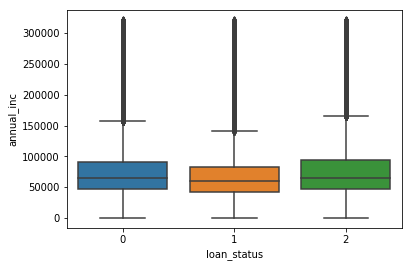

In [18]:
#LOAN_STATUS : 'Fully Paid' = 0, 'Charged Off' = 1, 'Current' = 2 

sns.boxplot(x="loan_status", y="annual_inc", data=df)
plt.show()

In [19]:
#dropping colums that have a percentage of missing values greater than 40% of the column size

def drop_nulls(df1,column):
    ## setting threshhold for which above the threshhold if nulls are present, the column will get deleted ##
    colnulls= df1[column].isnull().sum() 
    leng = len(df1) 
    perc = (colnulls / leng) * 100
    if perc >= 40:
        del df1[column]

In [20]:
#dropping columns that have missing values greater than or equal to 40%

print("Original shape of the DataFrame:" +str(df.shape))
for i in df.columns:
    drop_nulls(df,i)
print("Reduced shape of DataFrame: " + str(df.shape))

Original shape of the DataFrame:(1595158, 151)
Reduced shape of DataFrame: (1595158, 93)


Reducing the count from 150 columns to 92 columns

In [21]:
#view the number of missing nulls in the dataset in the remaining 92 columns

for i in df.columns:
    print(i + " \t " + str(df[i].isnull().sum()))

id 	 0
loan_amnt 	 0
funded_amnt 	 0
funded_amnt_inv 	 0
term 	 0
int_rate 	 0
installment 	 0
grade 	 0
sub_grade 	 0
emp_title 	 99433
emp_length 	 92472
home_ownership 	 0
annual_inc 	 0
verification_status 	 0
issue_d 	 0
loan_status 	 0
pymnt_plan 	 0
purpose 	 0
title 	 22115
zip_code 	 1
addr_state 	 0
dti 	 348
delinq_2yrs 	 0
earliest_cr_line 	 0
fico_range_low 	 0
fico_range_high 	 0
inq_last_6mths 	 1
open_acc 	 0
pub_rec 	 0
revol_bal 	 0
revol_util 	 927
total_acc 	 0
initial_list_status 	 0
out_prncp 	 0
out_prncp_inv 	 0
total_pymnt 	 0
total_pymnt_inv 	 0
total_rec_prncp 	 0
total_rec_int 	 0
total_rec_late_fee 	 0
recoveries 	 0
collection_recovery_fee 	 0
last_pymnt_d 	 1463
last_pymnt_amnt 	 0
last_credit_pull_d 	 66
last_fico_range_high 	 0
last_fico_range_low 	 0
collections_12_mths_ex_med 	 56
policy_code 	 0
application_type 	 0
acc_now_delinq 	 0
tot_coll_amt 	 67298
tot_cur_bal 	 67298
total_rev_hi_lim 	 67298
acc_open_past_24mths 	 47104
avg_cur_bal 	 67317
bc

# 2. FEATURE ENGINEERING

In [22]:
df['earliest_cr_line'].head()

0    Aug-1994
1    Sep-1989
2    Aug-2003
3    Oct-2000
4    Aug-2002
Name: earliest_cr_line, dtype: object

In [23]:
#for getting how long a person has held the loan with the number of lines of credit, higher the better

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [24]:
dttoday = datetime.now().strftime('%Y-%m-%d')

In [25]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: (np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

In [26]:
df['earliest_cr_line'].head()

0    23.715068
1    28.632877
2    14.709589
3    17.542466
4    15.709589
Name: earliest_cr_line, dtype: float64

In [27]:
#creating the mean FICO

df['fico_range'] = df.fico_range_low.astype('str') + '-' + df.fico_range_high.astype('str')
df['meanfico'] = (df.fico_range_low + df.fico_range_high)/2

df = df.drop(['fico_range_high','fico_range_low','fico_range'], axis=1)

In [28]:
print(df.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'c

In [29]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,an_out,meanfico
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,0,n,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,23.715068,0.0,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,Nov-2017,684.0,680.0,0.0,1.0,Individual,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N,0,752.0
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,1,n,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,28.632877,2.0,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,Feb-2017,564.0,560.0,0.0,1.0,Individual,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N,0,712.0
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,6 years,RENT,63800.0,Source Verified,Dec-2014,0,n,credit_card,Credit card refinancing,658xx,MO,18.49,0.0,14.709589,0.0,10.0,0.0,16374.0,76.2,35.0,w,0.00,0.00,25512.20,25512.20,21425.00,4087.20,0.0,0.00,0.0000,May-2016,17813.19,Dec-2017,704.0,700.0,0.0,1.0,Individual,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N,0,687.0
3,37612354,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000.0,Verified,Dec-2014,2,n,car,Car financing,953xx,CA,8.31,1.0,17.542466,0.0,8.0,0.0,5753.0,100.9,13.0,w,6673.54,6673.54,11207.67,11207.67,6126.46,5081.21,0.0,0.00,0.0000,Dec-2017,319.08,Dec-2017,629.0,625.0,0.0,1.0,Individual,0.0,0.0,261815.0,5700.0,2.0,32727.0,0.0,103.2,0.0,0.0,16.0,170.0,21.0,16.0,5.0,21.0,1.0,1.0,3.0,5.0,3.0,5.0,1.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,0.0,76.9,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0,N,Cash,N,0,667.0
4,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,Dec-2014,1,n,debt_consolidation,Debt consolidation,850xx,AZ,34.81,0.0,15.709589,1.0,11.0,0.0,16822.0,91.9,20.0,f,0.00,0.00,2281.98,2281.98,704.38,339.61,0.0,1237.99,222.8382,Aug-2015,17.70,Oct-2016,559.0,555.0,0.0,1.0,Individual,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.

In [30]:
dft = df.copy()

In [31]:
#dropping columns
drops = ['id', 'loan_amnt', 'funded_amnt_inv',
       'grade', 'sub_grade', 'emp_title','issue_d',
       'title', 'zip_code', 'delinq_2yrs','pub_rec',
       'inq_last_6mths', 'open_acc', 'revol_bal', 
       'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']

dft = dft.drop(drops, axis=1)

In [32]:
#dropping all rows containing NA's
dft = dft.dropna(axis=0)

In [33]:
#remove columns that have only few values in distinguishing them
dropes = ['pymnt_plan','hardship_flag','disbursement_method','debt_settlement_flag']
dft = dft.drop(dropes, axis= 1)

In [34]:
#view if there are any correlations
dft.corr()

,funded_amnt,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,revol_util,an_out,meanfico
funded_amnt,1.000000,0.146263,0.946457,0.466735,0.060087,0.053756,0.180882,0.117163,NaN,0.104883
int_rate,0.146263,1.000000,0.159970,-0.116027,-0.014511,0.164573,-0.113044,0.241572,NaN,-0.404073
installment,0.946457,0.159970,1.000000,0.444991,0.017941,0.050581,0.154966,0.128738,NaN,0.054506
annual_inc,0.466735,-0.116027,0.444991,1.000000,0.028230,-0.199663,0.230146,0.057653,NaN,0.103370
loan_status,0.060087,-0.014511,0.017941,0.028230,1.000000,0.084288,-0.073241,0.000571,NaN,-0.021447
dti,0.053756,0.164573,0.050581,-0.199663,0.084288,1.000000,0.027403,0.162009,NaN,-0.061609
earliest_cr_line,0.180882,-0.113044,0.154966,0.230146,-0.073241,0.027403,1.000000,0.042193,NaN,0.105577
revol_util,0.117163,0.241572,0.128738,0.057653,0.000571,0.162009,0.042193,1.000000,NaN,-0.451398
an_out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meanfico,0.104883,-0.404073,0.054506,0.103370,-0.021447,-0.061609,0.105577,-0.451398,NaN,1.000000


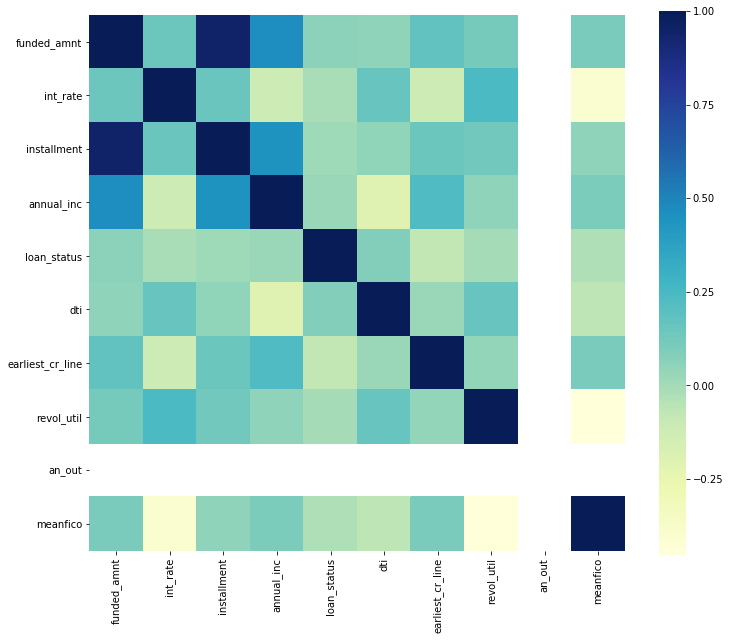

In [35]:
#checking the correlation amongst the columns - there is one hence it can be deleted

corr = dft.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax=ax, cmap="YlGnBu")
plt.axis('image')
plt.show()

In [36]:
#removing installment as it looks like it has a direct relationship with funded_amnt
dft = dft.drop('installment', axis=1)

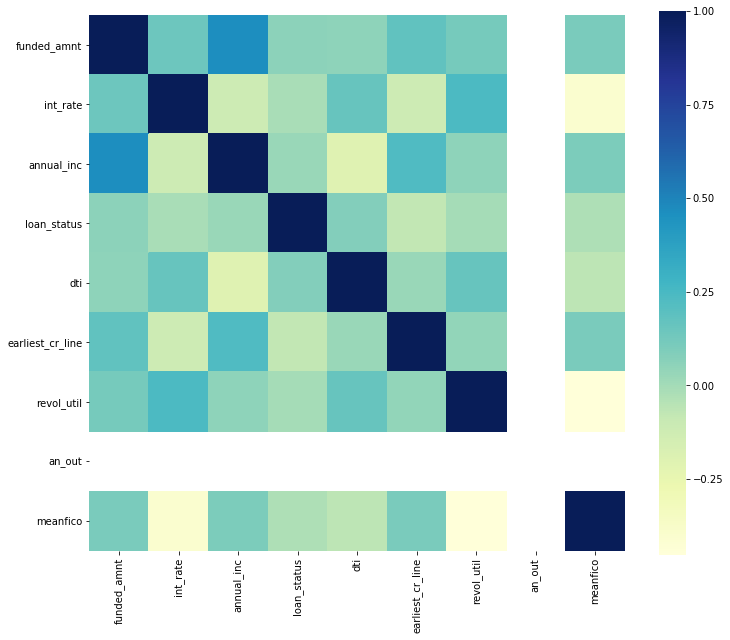

In [37]:
corr = dft.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax=ax, cmap = "YlGnBu")
plt.axis('image')
plt.show()

In [38]:
dft.head()

,funded_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,revol_util,initial_list_status,application_type,an_out,meanfico
0,15000.0,60 months,12.39,10+ years,RENT,78000.0,Source Verified,0,debt_consolidation,VA,12.03,23.715068,29.0,w,Individual,0,752.0
1,10400.0,36 months,6.99,8 years,MORTGAGE,58000.0,Not Verified,1,credit_card,CA,14.92,28.632877,31.6,w,Individual,0,712.0
2,21425.0,60 months,15.59,6 years,RENT,63800.0,Source Verified,0,credit_card,MO,18.49,14.709589,76.2,w,Individual,0,687.0
3,12800.0,60 months,17.14,10+ years,MORTGAGE,125000.0,Verified,2,car,CA,8.31,17.542466,100.9,w,Individual,0,667.0
4,7650.0,36 months,13.66,< 1 year,RENT,50000.0,Source Verified,1,debt_consolidation,AZ,34.81,15.709589,91.9,f,Individual,0,687.0


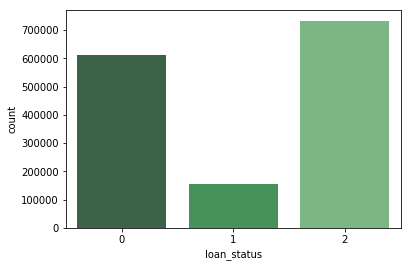

In [39]:
#LOAN_STATUS : 'Fully Paid' = 0, 'Charged Off' = 1, 'Current' = 2
sns.countplot(x="loan_status", data=dft, palette="Greens_d")
plt.show()

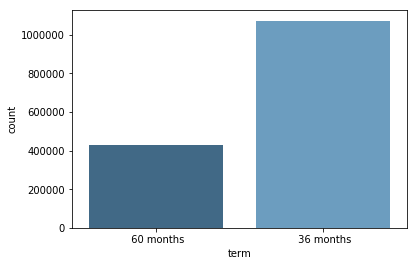

In [40]:
#TERM : 60-month term and 36-month term
sns.countplot(x="term", data=dft, palette="Blues_d")
plt.show()

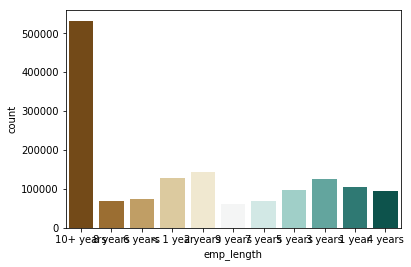

In [41]:
#EMPLOYEE LENGTH : employee lengths differ
sns.countplot(x="emp_length", data=dft, palette="BrBG")
plt.show()

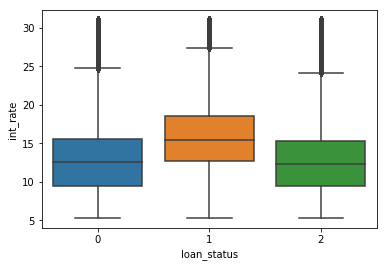

In [42]:
#LOAN_STATUS : 'Fully Paid' = 0, 'Charged Off' = 1, 'Current' = 2
sns.boxplot(x="loan_status", y="int_rate", data=dft)
plt.show()

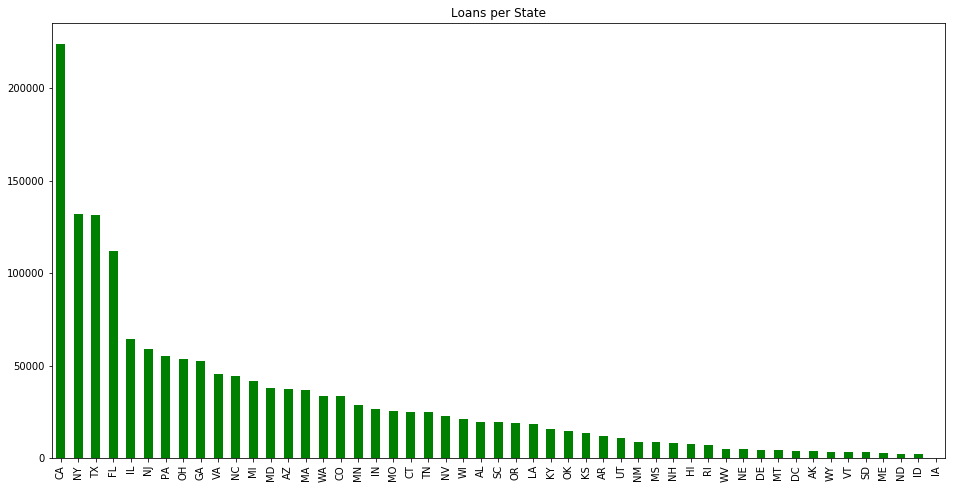

In [43]:
state_count = df['addr_state'].value_counts()
state_count.plot(kind = 'bar',figsize=(16,8),color='green', title = 'Loans per State')
plt.show()

In [44]:
#to see which states do the highest number of defaulters come from

charged_off = df[df['loan_status'] == 1]
paid = df[df['loan_status']== 0]

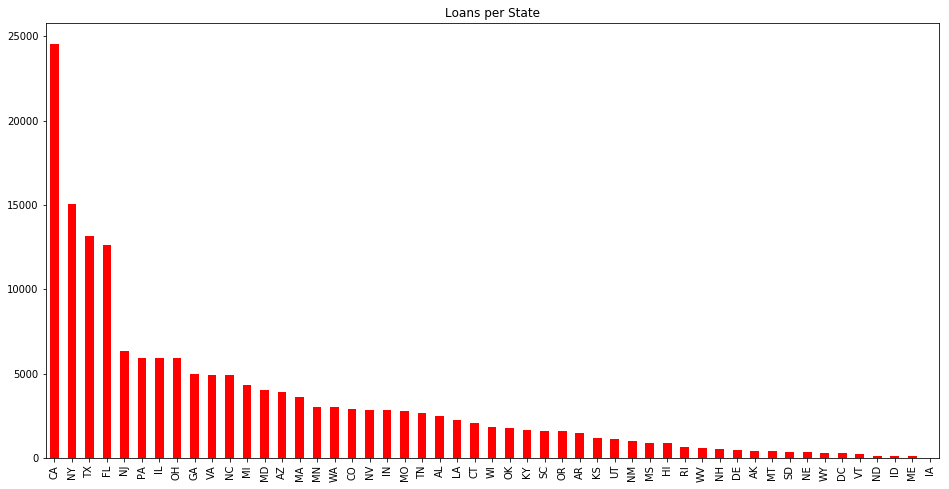

In [45]:
state_count = charged_off['addr_state'].value_counts()
state_count.plot(kind = 'bar',figsize=(16,8),color='red', title = 'Loans per State')
plt.show()

purpose
car                     7593
credit_card           143270
debt_consolidation    375512
educational              269
home_improvement       41031
house                   3179
major_purchase         14181
medical                 6727
moving                  4308
other                  34152
renewable_energy         447
small_business          7033
vacation                4088
wedding                 1988
Name: purpose, dtype: int64


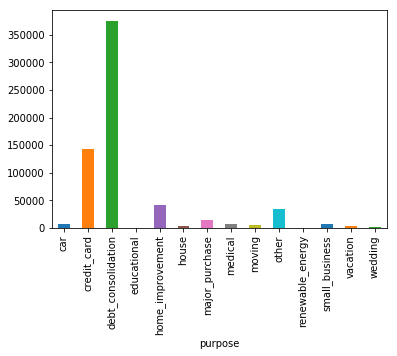

In [46]:
# distribution of loans by purpose
loans_by_purpose = paid.groupby('purpose')
print(loans_by_purpose['purpose'].count())
loans_by_purpose['purpose'].count().plot(kind='bar')
plt.show()

# 3. Convert Categorical Columns To Numeric Features & One-hot encoding

In [47]:
df_cat = dft.copy()

In [48]:
df_cat.shape

(1501794, 17)

In [49]:
#printing columns that have "object" datatype
df_obj = df_cat.select_dtypes(include=['object'])
print(df_obj.iloc[0])

term                            60 months
emp_length                      10+ years
home_ownership                       RENT
verification_status       Source Verified
purpose                debt_consolidation
addr_state                             VA
initial_list_status                     w
application_type               Individual
Name: 0, dtype: object


In [50]:
#converting "term" to categorical
print(df_cat['term'].value_counts())

term_map = {
                "term" :  {
                    " 36 months":    0,
                    " 60 months":    1,}
}

df_cat = df_cat.replace(term_map)

print(df_cat['term'].value_counts())

 36 months    1072272
 60 months     429522
Name: term, dtype: int64
0    1072272
1     429522
Name: term, dtype: int64


In [51]:
#converting "employment length" to categorical values
print(df_cat['emp_length'].value_counts())

emp_length_map = {
                    "emp_length": {
                                        "10+ years": 10,
                                        "9 years": 9,
                                        "8 years": 8,
                                        "7 years": 7,
                                        "6 years": 6,
                                        "5 years": 5,
                                        "4 years": 4,
                                        "3 years": 3,
                                        "2 years": 2,
                                        "1 year": 1,
                                        "< 1 year": 0,
                                        "n/a": 0 }
}
df_cat = df_cat.replace(emp_length_map)

print(df_cat['emp_length'].value_counts())

10+ years    531975
2 years      143547
< 1 year     128918
3 years      126596
1 year       104112
5 years       98528
4 years       94931
6 years       73221
8 years       70323
7 years       68300
9 years       61343
Name: emp_length, dtype: int64
10    531975
2     143547
0     128918
3     126596
1     104112
5      98528
4      94931
6      73221
8      70323
7      68300
9      61343
Name: emp_length, dtype: int64


In [52]:
#changing the values to numeric in 'home_ownership' to categorical
print(df_cat['home_ownership'].value_counts())

df_cat['home_ownership'] = np.where(df_cat['home_ownership'] == 'MORTGAGE', 0, 
                           np.where(df_cat['home_ownership'] == 'RENT', 1,
                           np.where(df_cat['home_ownership'] == 'OWN', 2, 3)))

print(df_cat['home_ownership'].value_counts())

MORTGAGE    747498
RENT        600474
OWN         153181
ANY            457
OTHER          138
NONE            46
Name: home_ownership, dtype: int64
0    747498
1    600474
2    153181
3       641
Name: home_ownership, dtype: int64


In [53]:
#converting "verfication status" to categorical
print(df_cat['verification_status'].value_counts())

df_cat['verification_status'] = np.where(df_cat['verification_status'] == "Not Verified", 0 ,1)

print(df_cat['verification_status'].value_counts())

Source Verified    590110
Not Verified       483024
Verified           428660
Name: verification_status, dtype: int64
1    1018770
0     483024
Name: verification_status, dtype: int64


In [54]:
#converting "purpose" column to categorical values
print(df_cat['purpose'].value_counts())

purpose_map = {
                "purpose" :  {
                    "debt_consolidation":    0,
                    "credit_card":           1,
                    "home_improvement":      2,
                    "other":                 3,
                    "major_purchase":        4,
                    "small_business":        5,
                    "medical":               6,
                    "car":                   7,
                    "moving":                8,
                    "vacation":              9,
                    "house":                 10,
                    "wedding":               11,
                    "renewable_energy":      12,
                    "educational":           13}
}

df_cat = df_cat.replace(purpose_map)

print(df_cat['purpose'].value_counts())

debt_consolidation    874993
credit_card           333253
home_improvement       97159
other                  83485
major_purchase         32347
small_business         17144
medical                16786
car                    16195
moving                 10278
vacation               10005
house                   6606
wedding                 2249
renewable_energy         980
educational              314
Name: purpose, dtype: int64
0     874993
1     333253
2      97159
3      83485
4      32347
5      17144
6      16786
7      16195
8      10278
9      10005
10      6606
11      2249
12       980
13       314
Name: purpose, dtype: int64


In [55]:
#converting "initial list status" into categorical components
print(df_cat['initial_list_status'].value_counts())

df_cat['initial_list_status'] = np.where(df_cat['initial_list_status'] == 'w', 0,1)

print(df_cat['initial_list_status'].value_counts())

w    920606
f    581188
Name: initial_list_status, dtype: int64
0    920606
1    581188
Name: initial_list_status, dtype: int64


In [56]:
#converting "application type" into categorical components
print(df_cat['application_type'].value_counts())

df_cat['application_type'] = np.where(df_cat['application_type'] == 'Individual', 0,1)

print(df_cat['application_type'].value_counts())

Individual    1472557
Joint App       29237
Name: application_type, dtype: int64
0    1472557
1      29237
Name: application_type, dtype: int64


In [57]:
#converting "addr_state" into categorical components
from sklearn import preprocessing
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
# State is string and we want discre integer values
df_cat['addr_state'] = label_encoder.fit_transform(df_cat['addr_state'])


In [58]:
df_cat

,funded_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,revol_util,initial_list_status,application_type,an_out,meanfico
0,15000.0,1,12.39,10,1,78000.0,1,0,0,45,12.03,23.715068,29.0,0,0,0,752.0
1,10400.0,0,6.99,8,0,58000.0,0,1,1,4,14.92,28.632877,31.6,0,0,0,712.0
2,21425.0,1,15.59,6,1,63800.0,1,0,1,24,18.49,14.709589,76.2,0,0,0,687.0
3,12800.0,1,17.14,10,0,125000.0,1,2,7,4,8.31,17.542466,100.9,0,0,0,667.0
4,7650.0,0,13.66,0,1,50000.0,1,1,0,3,34.81,15.709589,91.9,1,0,0,687.0
5,9600.0,0,13.66,10,1,69000.0,1,0,0,31,25.81,25.463014,59.4,1,0,0,682.0
6,2500.0,0,11.99,0,0,89000.0,1,0,2,23,13.77,16.542466,94.3,1,0,0,687.0
7,16000.0,1,11.44,6,2,109777.0,1,0,0,45,11.63,14.457534,60.4,0,0,0,702.0
8,23325.0,0,14.31,10,1,72000.0,1,1,1,47,27.03,19.545205,82.2,1,0,0,667.0
9,5250.0,0,11.44,2,1,26000.0,0,0,0,20,14.36,8.956164,20.2,1,0,0,747.0


In [59]:
def uniques(df,i):
    ## gives you the list of unique entries in that column and how many times they occur in that column
    print("Number of unique values in the column are: " +str(len(df[i].unique())))
    print("The count of the values in that column are: \n" +str(df[i].value_counts()))

# CLASSIFICATION PROBLEM - Building the model

In [60]:
df1 = df_cat.copy()

In [61]:
df1.isnull().sum()

funded_amnt            0
term                   0
int_rate               0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
revol_util             0
initial_list_status    0
application_type       0
an_out                 0
meanfico               0
dtype: int64

In [62]:
df1.columns

Index(['funded_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'application_type', 'an_out', 'meanfico'],
      dtype='object')

In [63]:
df1.head(3)

,funded_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,revol_util,initial_list_status,application_type,an_out,meanfico
0,15000.0,1,12.39,10,1,78000.0,1,0,0,45,12.03,23.715068,29.0,0,0,0,752.0
1,10400.0,0,6.99,8,0,58000.0,0,1,1,4,14.92,28.632877,31.6,0,0,0,712.0
2,21425.0,1,15.59,6,1,63800.0,1,0,1,24,18.49,14.709589,76.2,0,0,0,687.0


In [64]:
#current - validation set
validate = pd.DataFrame(df1[df1['loan_status'] == 2])
y_val = validate['loan_status']

#fully paid and charged off - main set which we will further split to test and train to get a decent accuracy on the test set.
df_main = pd.DataFrame(df1[df1['loan_status'] != 2])
y = pd.DataFrame(df_main['loan_status'])

In [65]:
y.head()

,loan_status
0,0
1,1
2,0
4,1
5,0


In [66]:
#keeping only continuous and nominal category variables
nominal_columns = ["initial_list_status","application_type","emp_length","home_ownership","addr_state",
                   "verification_status","purpose","term"]

dummy_df = pd.DataFrame(pd.get_dummies(df_main, columns = nominal_columns))

In [67]:
dummy_df.head()

,funded_amnt,int_rate,annual_inc,loan_status,dti,earliest_cr_line,revol_util,an_out,meanfico,initial_list_status_0,initial_list_status_1,application_type_0,application_type_1,emp_length_0,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,addr_state_7,addr_state_8,addr_state_9,addr_state_10,addr_state_11,addr_state_12,addr_state_13,addr_state_14,addr_state_15,addr_state_16,addr_state_17,addr_state_18,addr_state_19,addr_state_20,addr_state_21,addr_state_22,addr_state_23,addr_state_24,addr_state_25,addr_state_26,addr_state_27,addr_state_28,addr_state_29,addr_state_30,addr_state_31,addr_state_32,addr_state_33,addr_state_34,addr_state_35,addr_state_36,addr_state_37,addr_state_38,addr_state_39,addr_state_40,addr_state_41,addr_state_42,addr_state_43,addr_state_44,addr_state_45,addr_state_46,addr_state_47,addr_state_48,addr_state_49,addr_state_50,verification_status_0,verification_status_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,term_0,term_1
0,15000.0,12.39,78000.0,0,12.03,23.715068,29.0,0,752.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10400.0,6.99,58000.0,1,14.92,28.632877,31.6,0,712.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,21425.0,15.59,63800.0,0,18.49,14.709589,76.2,0,687.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7650.0,13.66,50000.0,1,34.81,15.709589,91.9,0,687.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,9600.0,13.66,69000.0,0,25.81,25.463014,59.4,0,682.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [68]:
lister = ['funded_amnt','annual_inc','int_rate','dti','earliest_cr_line','revol_util','meanfico']

In [69]:
dummy_df = dummy_df.drop(lister, axis=1)

In [70]:
df_main = pd.DataFrame(pd.concat([df_main, dummy_df], axis=1))

In [71]:
#drop the main columns and keep only dummies and integer value columns
df_main = df_main.drop(nominal_columns, axis=1)

In [72]:
df_main.head(5)

,funded_amnt,int_rate,annual_inc,loan_status,dti,earliest_cr_line,revol_util,an_out,meanfico,loan_status,an_out,initial_list_status_0,initial_list_status_1,application_type_0,application_type_1,emp_length_0,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,addr_state_7,addr_state_8,addr_state_9,addr_state_10,addr_state_11,addr_state_12,addr_state_13,addr_state_14,addr_state_15,addr_state_16,addr_state_17,addr_state_18,addr_state_19,addr_state_20,addr_state_21,addr_state_22,addr_state_23,addr_state_24,addr_state_25,addr_state_26,addr_state_27,addr_state_28,addr_state_29,addr_state_30,addr_state_31,addr_state_32,addr_state_33,addr_state_34,addr_state_35,addr_state_36,addr_state_37,addr_state_38,addr_state_39,addr_state_40,addr_state_41,addr_state_42,addr_state_43,addr_state_44,addr_state_45,addr_state_46,addr_state_47,addr_state_48,addr_state_49,addr_state_50,verification_status_0,verification_status_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,term_0,term_1
0,15000.0,12.39,78000.0,0,12.03,23.715068,29.0,0,752.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10400.0,6.99,58000.0,1,14.92,28.632877,31.6,0,712.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,21425.0,15.59,63800.0,0,18.49,14.709589,76.2,0,687.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7650.0,13.66,50000.0,1,34.81,15.709589,91.9,0,687.0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,9600.0,13.66,69000.0,0,25.81,25.463014,59.4,0,682.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
#Defining X and y
X = df_main.drop('loan_status', axis=1)

In [74]:
X.head()

,funded_amnt,int_rate,annual_inc,dti,earliest_cr_line,revol_util,an_out,meanfico,an_out,initial_list_status_0,initial_list_status_1,application_type_0,application_type_1,emp_length_0,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,addr_state_7,addr_state_8,addr_state_9,addr_state_10,addr_state_11,addr_state_12,addr_state_13,addr_state_14,addr_state_15,addr_state_16,addr_state_17,addr_state_18,addr_state_19,addr_state_20,addr_state_21,addr_state_22,addr_state_23,addr_state_24,addr_state_25,addr_state_26,addr_state_27,addr_state_28,addr_state_29,addr_state_30,addr_state_31,addr_state_32,addr_state_33,addr_state_34,addr_state_35,addr_state_36,addr_state_37,addr_state_38,addr_state_39,addr_state_40,addr_state_41,addr_state_42,addr_state_43,addr_state_44,addr_state_45,addr_state_46,addr_state_47,addr_state_48,addr_state_49,addr_state_50,verification_status_0,verification_status_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,term_0,term_1
0,15000.0,12.39,78000.0,12.03,23.715068,29.0,0,752.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10400.0,6.99,58000.0,14.92,28.632877,31.6,0,712.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,21425.0,15.59,63800.0,18.49,14.709589,76.2,0,687.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7650.0,13.66,50000.0,34.81,15.709589,91.9,0,687.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,9600.0,13.66,69000.0,25.81,25.463014,59.4,0,682.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
print(X.shape)
print(y.shape)

(768697, 97)
(768697, 1)


In [76]:
#splitting the test and train sets, keeping validation set untouched

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=42)

In [77]:
#standardizing X
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [78]:
y_train.head()

,loan_status
647315,0
1171385,0
21167,0
1426903,0
648842,0


In [79]:
# Basic code for setting up a model
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np

#One-hot encoding: Needed if the categorical variable is stored as numeric
from keras.utils import to_categorical

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [80]:
#y_cat = to_categorical(y_train)

y_cat = pd.DataFrame(pd.get_dummies(y_train['loan_status']))

In [81]:
y_cat.head()

,0,1
647315,1,0
1171385,1,0
21167,1,0
1426903,1,0
648842,1,0


In [82]:
y_test.head()

,loan_status
911137,0
984448,0
641427,0
880573,0
1373870,1


In [83]:
# Save the number of columns in predictors: n_cols
n_cols = X_train.shape[1]
print(n_cols)
# Set up the model: model
model = Sequential()

97


In [84]:
# Add the first layer/input layer
model.add(Dense(20, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.2))

# Add the second layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(2, activation = 'softmax'))

##sgd = optimizers.SGD(lr=0.01)
#print(sgd)
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#Confirming that the model compiled correctly 
#print("Loss function: " + model.loss)

# Compile the model
#model.compile(optimizer=optimizers.SGD(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
# Fitting the model
from keras.callbacks import TensorBoard

In [86]:
import tensorflow as tf

In [87]:
model.fit(X_train,y_cat,epochs = 10,verbose = 1,validation_split = 0.3, callbacks=[TensorBoard(log_dir='C:/temp/903')])

Instructions for updating:
Use the retry module or similar alternatives.
Train on 322852 samples, validate on 138366 samples
Epoch 1/10
322852/322852 [==============================] - 27s 84us/step - loss: 0.4689 - acc: 0.7976 - val_loss: 0.4604 - val_acc: 0.7966
Epoch 2/10
322852/322852 [==============================] - 27s 84us/step - loss: 0.4609 - acc: 0.7983 - val_loss: 0.4604 - val_acc: 0.7963
Epoch 3/10
322852/322852 [==============================] - 27s 84us/step - loss: 0.4601 - acc: 0.7988 - val_loss: 0.4597 - val_acc: 0.7962
Epoch 4/10
322852/322852 [==============================] - 27s 84us/step - loss: 0.4597 - acc: 0.7987 - val_loss: 0.4594 - val_acc: 0.7970
Epoch 5/10
322852/322852 [==============================] - 27s 83us/step - loss: 0.4594 - acc: 0.7990 - val_loss: 0.4593 - val_acc: 0.7969
Epoch 6/10
322852/322852 [==============================] - 27s 84us/step - loss: 0.4591 - acc: 0.7991 - val_loss: 0.4595 - val_acc: 0.7965
Epoch 7/10
322852/322852 [=========

In [88]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1960      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 2,422
Trainable params: 2,422
Non-trainable params: 0
_________________________________________________________________


[array([[-2.1774368e+00, -2.7257462e-03, -3.2340708e-01, ...,
         -1.0167732e+00,  2.1398151e-01,  4.0035433e-01],
        [-6.3810217e-01,  4.0401906e-01, -1.3086489e+00, ...,
         -1.7255447e+00,  7.1238291e-01,  7.6208824e-01],
        [ 6.1288911e-01, -6.6352099e-01,  1.4849381e-01, ...,
          3.8368627e-01, -1.2048351e+00,  4.5675001e-01],
        ...,
        [ 3.7376981e-03, -6.7459017e-02,  1.0732373e-01, ...,
          4.9715833e-04, -6.2109303e-02,  2.1224561e-01],
        [ 4.7225893e-01, -6.1532956e-01,  4.8206007e-01, ...,
          3.5790178e-01, -3.6180988e-01, -2.6277241e-01],
        [-5.5357081e-01,  3.5247487e-01, -9.2198521e-02, ...,
         -3.0716351e-01,  1.5219738e-01,  4.1838488e-01]], dtype=float32),
 array([-0.5104216 , -0.8694015 , -0.38147283, -0.27067927, -0.3688551 ,
        -1.1852772 , -0.65788996,  0.09054008, -0.53638726, -0.41087577,
        -0.18612795, -1.064296  , -0.41480196, -0.25442863, -0.8274895 ,
        -0.54202735, -0.4827568

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, classification_report 

predictions = model.predict_classes(X_test)
print('\n')

print('Actual')
print(pd.Series(predictions).value_counts(), '\n')

print('Test set validation')
print(y_test['loan_status'].value_counts(), '\n')

print('Accuracy on test data:', accuracy_score(y_test, predictions), '\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions), sep = '')

#print(classification_report(y_test,predictions))




Actual
0    306437
1      1042
dtype: int64 

Test set validation
0    245446
1     62033
Name: loan_status, dtype: int64 

Accuracy on test data: 0.7989748893420364 

Confusion matrix: 
[[245036    410]
 [ 61401    632]]


In [ ]:
main_PRED = model.predict_classes(validation)

# Logistic Regression

In [92]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [93]:
### Logistic regression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
y_pred = logistic.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[240841   4605]
 [ 56724   5309]]


In [95]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


# CLUSTERING 

In [96]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_train)
# Getting the cluster labels

In [97]:
y_test['pred'] =kmeans.predict(X_test)
# Centroid values
centroids = kmeans.cluster_centers_

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
